In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 200)

In [2]:
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('omw-1.4')
nltk.download('wordnet')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/alexandernazimov/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/alexandernazimov/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Data preparation 

In [110]:
data = pd.read_csv('Ifood_new.csv')
data.drop(columns=['img_url'], inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            255 non-null    object
 1   ingredients     255 non-null    object
 2   diet            255 non-null    object
 3   prep_time       255 non-null    int64 
 4   cook_time       255 non-null    int64 
 5   flavor_profile  255 non-null    object
 6   course          255 non-null    object
 7   state           255 non-null    object
 8   region          254 non-null    object
dtypes: int64(2), object(7)
memory usage: 18.1+ KB


In [111]:
data.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Adhirasam,"Rice flour, jaggery, ghee, vegetable oil, elachi",vegetarian,10,50,sweet,dessert,West Bengal,East
1,Aloo gobi,"Cauliflower, potato, garam masala, turmeric, c...",vegetarian,10,20,spicy,main course,Punjab,North
2,Aloo matar,"Potato, peas, chillies, ginger, garam masala, ...",vegetarian,5,40,spicy,main course,Punjab,North
3,Aloo methi,"Potato, fenugreek leaves, chillies, salt, oil",vegetarian,10,40,bitter,main course,Punjab,North
4,Aloo shimla mirch,"Potato, shimla mirch, garam masala, amchur pow...",vegetarian,10,40,spicy,main course,Punjab,North


In [112]:
(
data
    .flavor_profile
    .replace('-1', 
             'mixed', 
             inplace=True
            )
)

(
data
    .region
    .replace('-1', 
             np.nan, 
             inplace=True
            )
)

(
data
    .state
    .replace('-1', 
             np.nan, 
             inplace=True
            )
)

In [114]:
cols_cat = ['diet', 'flavor_profile', 'state', 'region', 'course']

for col in cols_cat:
    data[col] = data[col].astype('category')
    
cols_32 = ['prep_time', 'cook_time']

for col in cols_32:
    data[col] = data[col].astype(np.int32)

In [116]:
data_for_ing = data.copy()

ingridients = []

for ing in data_for_ing.ingredients:
    for i in ing.split(','):
        ingridients.append(i.strip().lower())

In [117]:
wordnet_lemmatizer = WordNetLemmatizer()

In [118]:
lemmatized_data = [wordnet_lemmatizer.lemmatize(ingr) for ingr in ingridients]

In [119]:
ingridients_count = {}

for ing in lemmatized_data:
    count = 0
    for data_ in data_for_ing.ingredients:
        if ing in data_:
            count += 1
    ingridients_count[ing] = count

In [120]:
ingridients = pd.DataFrame([ingridients_count]).T.sort_values(by=0, ascending=False)

## First look

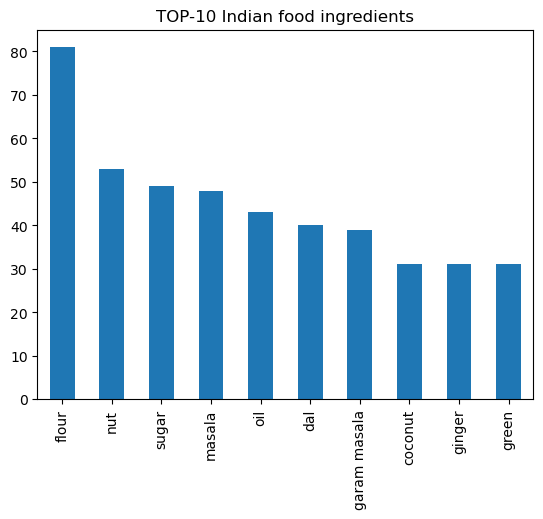

In [121]:
(
ingridients[0]
    .head(10)
    .plot(kind='bar', 
          title='TOP-10 Indian food ingredients'
         ))

plt.show()

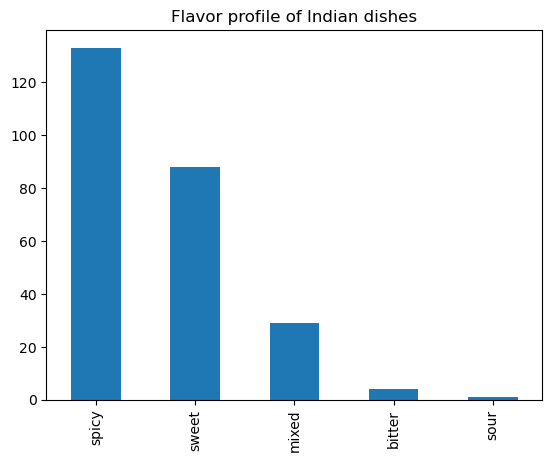

In [122]:
(
data
    .flavor_profile
    .value_counts()
    .plot(kind='bar', 
          title='Flavor profile of Indian dishes'
         ))

plt.show()

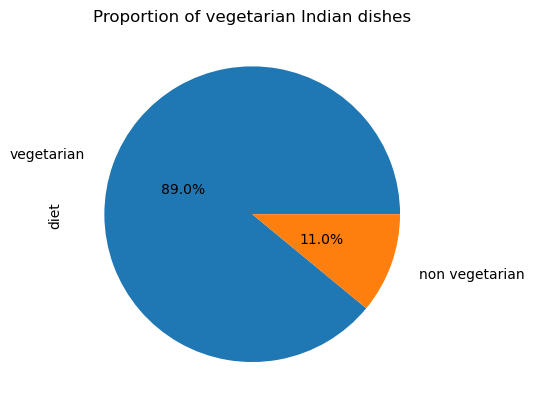

In [123]:
(
data
    .diet
    .value_counts()
    .plot(
        kind='pie', 
        title='Proportion of vegetarian Indian dishes',
        autopct='%1.1f%%',
        pctdistance=.5,
        labeldistance=1.2
    ))

plt.show()

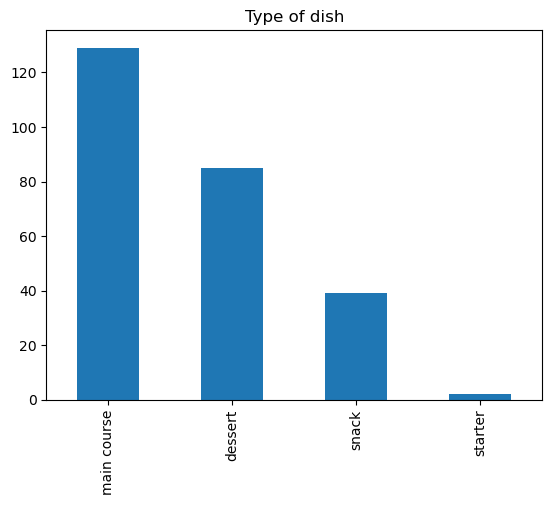

In [124]:
(
data
    .course
    .value_counts()
    .plot(kind='bar', 
          title='Type of dish'
         )
)
plt.show()

In [125]:
data['full_cooking_time'] = data.prep_time + data.cook_time

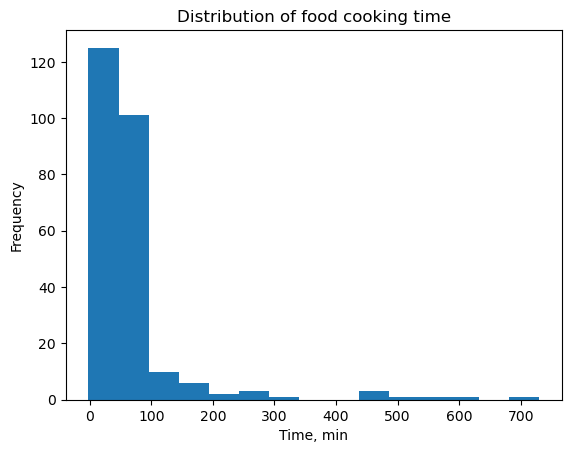

In [126]:
(
data
    .full_cooking_time
    .plot(kind='hist', 
          bins=15,
          title='Distribution of food cooking time'
         )
)
plt.xlabel('Time, min')
plt.show()

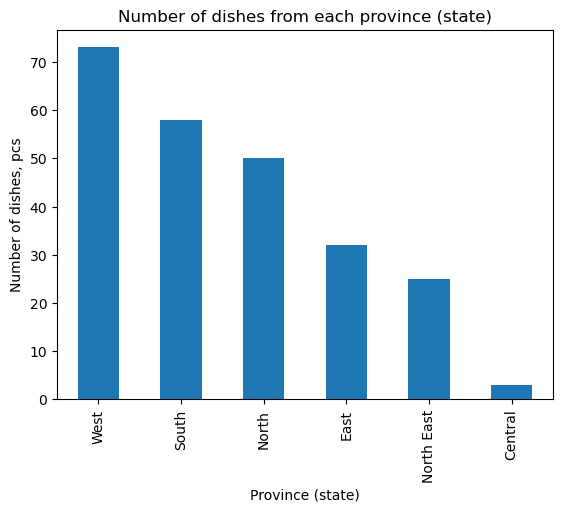

In [127]:
(
data
    .region
    .value_counts()
    .plot(kind='bar',
          title='Number of dishes from each province (state)',
          xlabel='Province (state)',
          ylabel='Number of dishes, pcs'
         )
)

plt.show()

## Conclusion

1. Vegetarian dishes make up the largest share of Indian cuisine.  
2. Basically, the total cooking time does not exceed 100 minutes.  
3. Hot and sweet flavors make up half of all flavors in Indian cuisine.  
4. The largest number of dishes belong to the western provinces, followed by the southern and northern provinces, respectively.

## Details

### Spicy + non veg

In [153]:
spicy = data[(data.flavor_profile == 'spicy') & (data.diet != 'vegetarian')]

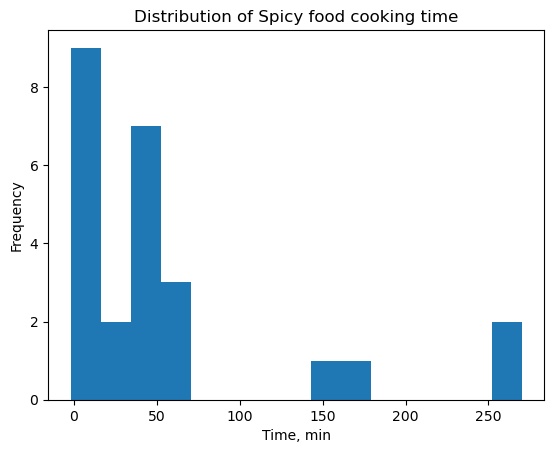

In [154]:
(
spicy
    .full_cooking_time
    .plot(kind='hist', 
          bins=15,
          title='Distribution of Spicy food cooking time'
         )
)
plt.xlabel('Time, min')
plt.show()

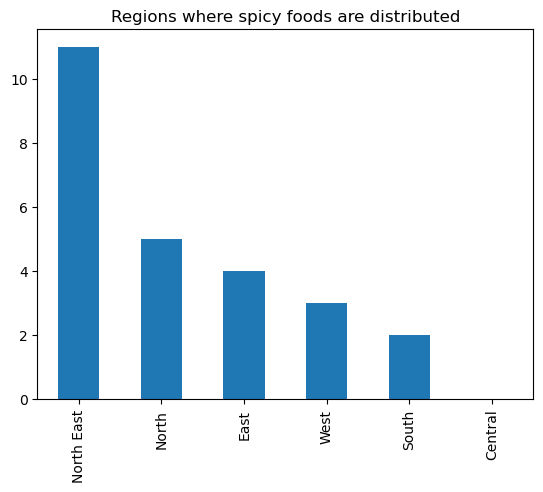

In [160]:
(
spicy
    .region
    .value_counts()
    .plot(kind='bar', 
          title='Regions where spicy foods are distributed'
         )
)
plt.show()

The largest number of spicy dishes from the northeastern provinces

### Main course 

In [158]:
main_course = data[data.course == 'main course']

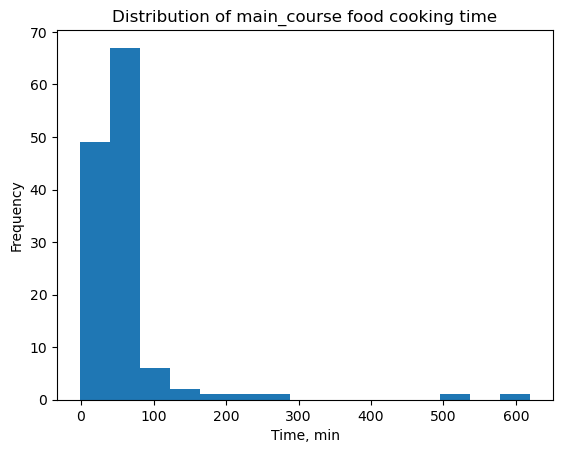

In [159]:
(
main_course
    .full_cooking_time
    .plot(kind='hist', 
          bins=15,
          title='Distribution of main_course food cooking time'
         )
)
plt.xlabel('Time, min')
plt.show()

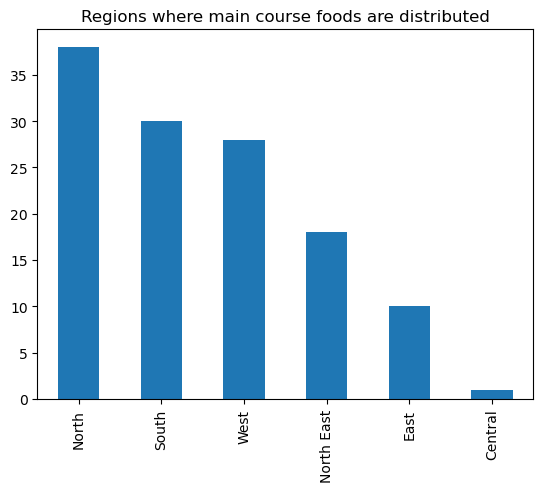

In [161]:
(
main_course
    .region
    .value_counts()
    .plot(kind='bar', 
          title='Regions where main course foods are distributed'
         )
)
plt.show()

The largest number of main course dishes from the north and south provinces